## Расчёт зависимости усиления от концентрации носителей в яме для InGaAs КЯ (~1060 нм)

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

In [2]:
class LD(object):
    def __init__(self, name, length, Ith, alpha_i, Gamma, eta_inj, A, B, C):
        self.name = name
        self.length = length
        self.Ith = Ith
        self.Jth = Ith/(self.length*100e-4)
        self.alpha_m = 1/(2*length)*np.log(1/0.09)
        self.alpha_i = alpha_i
        self.Gamma = Gamma
        self.d_qw = 90e-8
        self.gain = (self.alpha_i+self.alpha_m)/Gamma
        self.eta_inj = eta_inj
        self.A = A
        self.B = B
        self.C = C

        def carrier_RE(N, self):
            q = 1.6e-19
            return self.eta_inj*self.Jth/(q*self.d_qw) - self.A*N - self.B*N**2 - self.C*N**3

        self.Nth = float(optimize.fsolve(carrier_RE, 3e18, args=(self,)))

In [3]:
ld = LD(name='51-NL1265-1',
       length=1020e-4,
       Ith=0.225,
       alpha_i=0.9,
       Gamma=0.83e-2,
       eta_inj=1.0,
       A=2e8, B=1e-10, C=5e-30)
ld.gain

1530.5608366713159

Text(0.5, 1.0, '$g_0$ = 2142.0, $N_{tr}$ = 1.77e+18')

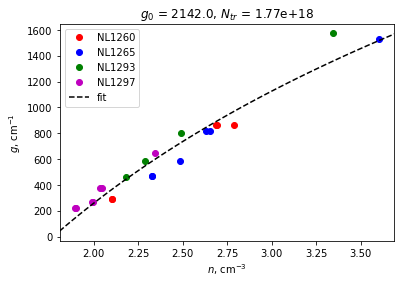

In [7]:
A = 0
B = 1.0e-10
C = 5e-30

# выглядит жутко, конечно
# NL1265
names = [str(n)+'-NL1265-1' for n in (51, 5, 6, 9, 10, 12)]
lengths = np.array([1020, 2040, 2040, 3020, 4060, 4060])*1e-4
Ith_values = np.array([225, 234.4, 230, 302.5, 354.3, 353.2])*1e-3
lds_NL1265 = list()
alpha_i = 0.9
Gamma = 0.83e-2
eta_inj = 1.0
for i in range(len(names)):
    ld = LD(name=names[i], length=lengths[i], Ith=Ith_values[i], alpha_i=alpha_i,
           Gamma=Gamma, eta_inj=eta_inj, A=A, B=B, C=C)
    lds_NL1265.append(ld) 
N_NL1265 = np.array([ld.Nth for ld in lds_NL1265])
gain_NL1265 = np.array([ld.gain for ld in lds_NL1265])

# NL1260
names = [str(n)+'-NL1260-1' for n in (12, 14, 15, 17, 18)]
lengths = np.array([980]*3+[4020]*2)*1e-4
Ith_values = np.array([129, 119.5, 119.1, 292, 291.4])*1e-3
lds_NL1260 = list()
alpha_i = 1.6
Gamma = 1.6e-2
eta_inj = 0.97
for i in range(len(names)):
    ld = LD(name=names[i], length=lengths[i], Ith=Ith_values[i], alpha_i=alpha_i,
           Gamma=Gamma, eta_inj=eta_inj, A=A, B=B, C=C)
    lds_NL1260.append(ld)
N_NL1260 = np.array([ld.Nth for ld in lds_NL1260])
gain_NL1260 = np.array([ld.gain for ld in lds_NL1260])

# NL1293
names = [str(n)+'-NL1293-1' for n in (1, 6, 9, 12)]
lengths = np.array([990, 2090, 3060, 4070])*1e-4
Ith_values = np.array([200, 226, 277, 333])*1e-3
lds_NL1293 = list()
alpha_i = 0.9
Gamma = 0.83e-2
eta_inj = 0.93
for i in range(len(names)):
    ld = LD(name=names[i], length=lengths[i], Ith=Ith_values[i], alpha_i=alpha_i,
           Gamma=Gamma, eta_inj=eta_inj, A=A, B=B, C=C)
    lds_NL1293.append(ld)
N_NL1293 = np.array([ld.Nth for ld in lds_NL1293])
gain_NL1293 = np.array([ld.gain for ld in lds_NL1293])

# NL1297
names = [str(n)+'-NL1297-1' for n in (13, 5, 6, 15, 16, 11, 17)]
lengths = np.array([1020, 1950, 1950, 3060, 3060, 4070, 4070])*1e-4
Ith_values = np.array([90, 128, 130, 193, 192, 230, 232])*1e-3
lds_NL1297 = list()
alpha_i = 1.76
Gamma = 2.1e-2
eta_inj = 1.0
for i in range(len(names)):
    ld = LD(name=names[i], length=lengths[i], Ith=Ith_values[i], alpha_i=alpha_i,
           Gamma=Gamma, eta_inj=eta_inj, A=A, B=B, C=C)
    lds_NL1297.append(ld)
N_NL1297 = np.array([ld.Nth for ld in lds_NL1297])
gain_NL1297 = np.array([ld.gain for ld in lds_NL1297])

N_all = np.concatenate([N_NL1260, N_NL1265, N_NL1293, N_NL1297])
g_all = np.concatenate([gain_NL1260, gain_NL1265, gain_NL1293, gain_NL1297])

def gain_log(n, g_0=2000, N_tr=1e18):
    return g_0*np.log(n/N_tr)

[g_0, N_tr], err = optimize.curve_fit(f=gain_log, xdata=N_all, ydata=g_all, p0=[2000, 1e18])

plt.close('all')
fig = plt.figure()
ax = fig.gca()

ax.plot(N_NL1260 * 1e-18, gain_NL1260, 'ro', label='NL1260')
ax.plot(N_NL1265 * 1e-18, gain_NL1265, 'bo', label='NL1265')
ax.plot(N_NL1293 * 1e-18, gain_NL1293, 'go', label='NL1293')
ax.plot(N_NL1297 * 1e-18, gain_NL1297, 'mo', label='NL1297')

x1, x2 = ax.get_xlim()
x_gain = np.linspace(x1, x2)
y_gain = gain_log(x_gain * 1e18, g_0, N_tr)
ax.plot(x_gain, y_gain, 'k--', label='fit')
ax.set_xlim((x1, x2))
ax.set_xlabel('$n$, cm$^{-3}$')
ax.set_ylabel('$g$, cm$^{-1}$')

ax.legend()
ax.set_title('$g_0$ = '+str(np.round(g_0, 0))+', $N_{tr}$ = '+str(np.round(N_tr*1e-18, 2)*1e18))